# Linear Regression

In [1]:
# Simple Linear Regression will be used to fit the resale HDB data (from 2012-01 onwards)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
hdb = pd.read_csv(r"C:\Users\Long Bing\Desktop\HDB Project\Resale_Flats_Dataset_2012_Onwards.csv")

In [5]:
hdb.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease
0,2012-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44,Improved,1979,257800,2012,66
1,2012-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,07 TO 09,44,Improved,1978,263000,2012,65
2,2012-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,10 TO 12,44,Improved,1978,275000,2012,65
3,2012-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45,Improved,1986,260000,2012,73
4,2012-01,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45,Improved,1986,226000,2012,73


In [6]:
#there are multi-collinear variables like year and remaining_lease. Use VIF to determine.

X = hdb._get_numeric_data().drop('resale_price',axis=1)     #drop non-numeric and target columns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["variables"] = X.columns
    return(vif)

#credits https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/

In [8]:
calc_vif(X)

,VIF,variables
0,1.838485e+01,floor_area_sqm
1,1.386965e+07,lease_commence_date
2,1.285393e+07,year
3,1.980797e+04,remaining_lease


In [9]:
Y = X.drop(['lease_commence_date','year'],axis=1)

In [10]:
calc_vif(Y)

,VIF,variables
0,16.510926,floor_area_sqm
1,16.510926,remaining_lease


In [11]:
hdb.nunique()

month                   108
town                     26
flat_type                 7
block                  2482
street_name             553
storey_range             25
floor_area_sqm          166
flat_model               20
lease_commence_date      54
resale_price           3499
year                      9
remaining_lease          55
dtype: int64

In [12]:
hdb_1 = hdb.drop(['month','block','flat_type','street_name','flat_model','lease_commence_date','year'],axis=1)

In [13]:
hdb_1.columns

Index(['town', 'storey_range', 'floor_area_sqm', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [14]:
#save this df for Decision Tree
hdb_1.to_csv(r"C:\Users\Long Bing\Desktop\HDB Project\Resale_Flats_Dataset_2012_Onwards_Non_Collinear.csv",index=False)

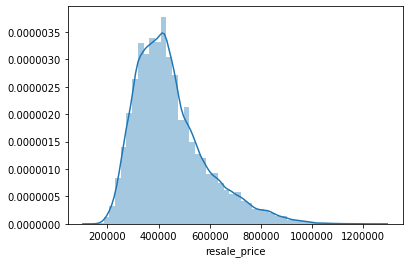

In [15]:
sns.distplot(hdb_1['resale_price'])

# One Hot Encode

In [16]:
hdb_1.columns

Index(['town', 'storey_range', 'floor_area_sqm', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [17]:
#one hot encode "town" column
ohe_town = pd.get_dummies(hdb_1.town)

In [18]:
#drop first variable
ohe_town.drop(['ANG MO KIO'],axis=1,inplace=True)

In [19]:
ohe_town

,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,GEYLANG,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
180159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
180160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
180161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
#one hot encode "town" column
ohe_storey = pd.get_dummies(hdb_1.storey_range)

In [21]:
#drop first variable
ohe_storey.drop(['01 TO 03'],axis=1,inplace=True)

In [22]:
ohe_storey

,01 TO 05,04 TO 06,06 TO 10,07 TO 09,10 TO 12,11 TO 15,13 TO 15,16 TO 18,16 TO 20,19 TO 21,...,28 TO 30,31 TO 33,31 TO 35,34 TO 36,36 TO 40,37 TO 39,40 TO 42,43 TO 45,46 TO 48,49 TO 51
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180158,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180160,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180161,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
hdb_2 = hdb_1.drop(['town','storey_range'],axis=1)

In [24]:
hdb_lm = pd.concat([hdb_2,ohe_town,ohe_storey],axis=1)

In [25]:
hdb_lm

,floor_area_sqm,resale_price,remaining_lease,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,...,28 TO 30,31 TO 33,31 TO 35,34 TO 36,36 TO 40,37 TO 39,40 TO 42,43 TO 45,46 TO 48,49 TO 51
0,44,257800,66,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44,263000,65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44,275000,65,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45,260000,73,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45,226000,73,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180158,146,560000,66,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180159,145,540000,66,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180160,142,638000,66,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180161,146,683500,66,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
hdb_lm.to_csv(r"C:\Users\Long Bing\Desktop\HDB Project\Resale_Flats_Dataset_2012_Onwards_Non_Collinear_OHE.csv",index=False)

# Train test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
hdb_lm.columns

Index(['floor_area_sqm', 'resale_price', 'remaining_lease', 'BEDOK', 'BISHAN',
       'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG', 'BUKIT TIMAH',
       'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI', 'GEYLANG', 'HOUGANG',
       'JURONG EAST', 'JURONG WEST', 'KALLANG/WHAMPOA', 'MARINE PARADE',
       'PASIR RIS', 'PUNGGOL', 'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN', '01 TO 05',
       '04 TO 06', '06 TO 10', '07 TO 09', '10 TO 12', '11 TO 15', '13 TO 15',
       '16 TO 18', '16 TO 20', '19 TO 21', '21 TO 25', '22 TO 24', '25 TO 27',
       '26 TO 30', '28 TO 30', '31 TO 33', '31 TO 35', '34 TO 36', '36 TO 40',
       '37 TO 39', '40 TO 42', '43 TO 45', '46 TO 48', '49 TO 51'],
      dtype='object')

In [78]:
X = hdb_lm.drop('resale_price',axis=1)
y = hdb_lm['resale_price']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 111)

# Model Training, Testing and Results

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [80]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
predictions = lm.predict(X_test)

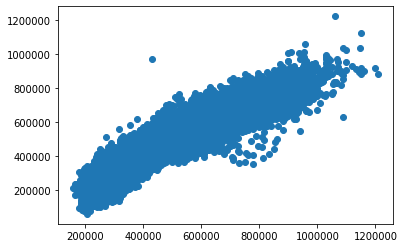

In [88]:
plt.scatter(y_test,predictions)

In [106]:
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
#Root Mean Squared Error
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions))
RMSE

58835.369255611724

In [108]:
#R^2 for model
R2 = r2_score(y_test,predictions)
R2

0.8254767046212301